In [1]:
import neo
import quantities as pq
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a reader
reader = neo.io.NeuralynxIO(dirname='R050-2014-03-28_32ktest_small', keep_original_times = True) # works
reader.parse_header()
print(reader)

NeuralynxIO: R050-2014-03-28_32ktest_small
nb_block: 1
nb_segment:  [1]
signal_channels: [CSC50, CSC51, CSC52]
unit_channels: [chTT13#16#0, chTT13#17#0, chTT13#18#0, chTT13#19#0]
event_channels: [Events event_id=11 ttl=0]



In [4]:
block = reader.read_block();
seg = block.segments[0]
analogsignal = seg.analogsignals[0]

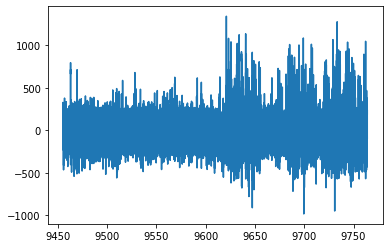

In [5]:
# access only one channel within loaded data
csc1 = analogsignal.magnitude[:, 1]
plt.plot(analogsignal.times, csc1)
plt.show()

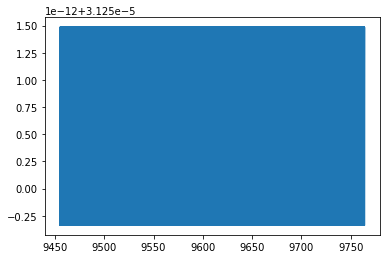

In [9]:
dt = np.diff(analogsignal.times)
plt.plot(analogsignal.times[0:-1], dt)

Note negative diffs??

In [10]:
dt.min()

array(3.12499997e-05) * s

In [13]:
dt.max()

array(3.12500015e-05) * s

(array([8062549.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1818026.]),
 array([3.12499997e-05, 3.12499998e-05, 3.12500000e-05, 3.12500002e-05,
        3.12500004e-05, 3.12500006e-05, 3.12500008e-05, 3.12500009e-05,
        3.12500011e-05, 3.12500013e-05, 3.12500015e-05]),
 <a list of 10 Patch objects>)

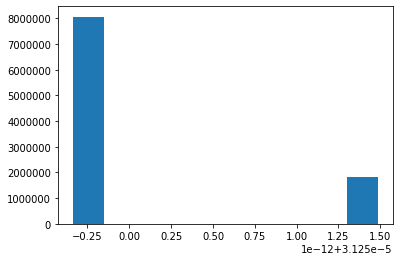

In [17]:
plt.hist(np.array(dt))